In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import scipy.stats as stats
import numpy as np
import pickle

In [2]:
fGCB = './../../Prelim_Data_Analysis/gcb_data/budget.csv'
df = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,4,5,6])
df.head()

,ocean sink,land sink,budget imbalance
Year,,,
1959,0.852376,0.516073,0.860316
1960,0.819017,1.394030,0.522722
1961,0.714842,0.605098,1.213762
1962,0.756709,1.348349,0.959605
1963,0.904997,0.877794,1.355333


In [3]:
df.tail()

,ocean sink,land sink,budget imbalance
Year,,,
2014,2.556489,3.803287,0.607382
2015,2.580257,1.837847,0.693385
2016,2.636438,2.577243,-0.218888
2017,2.506476,3.782197,0.324101
2018,2.628250,3.468828,0.253418


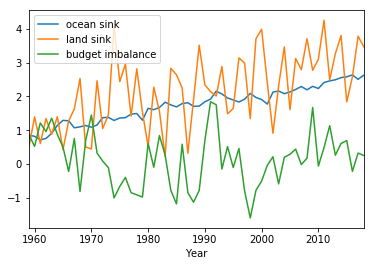

In [4]:
df.plot()

In [5]:
ocean = -df["ocean sink"]
land_model = -df["land sink"]
land = -df["land sink"]-df["budget imbalance"]

Text(0.5, 1.0, 'p')

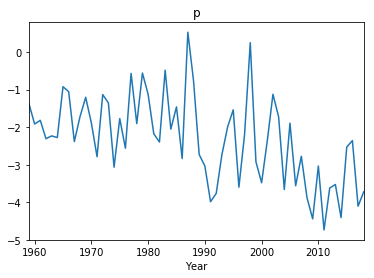

In [6]:
land.plot()
plt.title("p")

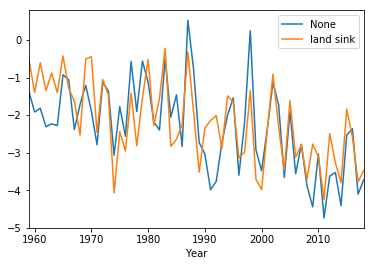

In [7]:
land.plot()
land_model.plot()
plt.legend()

In [8]:
def lin_reg(time_list, data, **kwargs):
    
    regression = {}
    for period in time_list.keys():
        x=time_list[period]
        y=data[x].values

        reg = stats.linregress(x,y)
        slope=reg[0]
        intercept=reg[1]
        
        line = slope*x+intercept
        
        regression[period] = (reg[0], reg[2])

        plt.plot(x, line, **kwargs)
    
    return regression

In [9]:
x1=ocean.index[1:12]
x2=ocean.index[11:22]
x3=ocean.index[21:32]
x4=ocean.index[31:42]
x5=ocean.index[41:52]
x6=ocean.index[48:]
x7=ocean.index

In [10]:
time_dict={'1960-1970':x1, '1970-1980':x2, '1980-1990':x3, '1990-2000':x4,
           '2000-2010':x5, '2007-2018':x6}

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

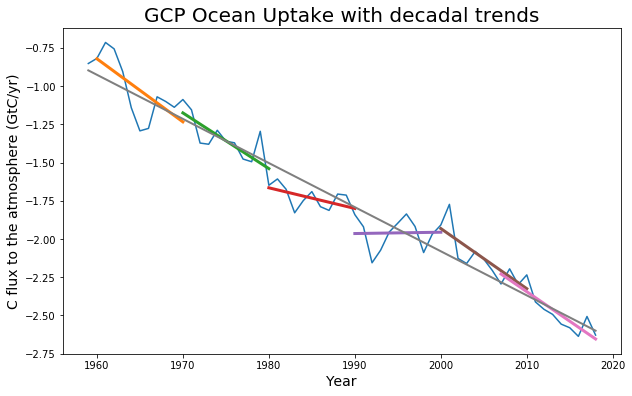

In [11]:
plt.figure(figsize=(10,6))
plt.plot(ocean)
ocean_decade = lin_reg(time_dict, ocean, linewidth=3)
ocean_whole = lin_reg({'1959-2018':x7}, ocean, linewidth=2)
plt.title('GCP Ocean Uptake with decadal trends', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('C flux to the atmosphere (GtC/yr)', fontsize=14)

In [12]:
ocean_decade, ocean_whole

({'1960-1970': (-0.041244831000909095, -0.685428971071531),
  '1970-1980': (-0.03643333040818182, -0.7784236156422163),
  '1980-1990': (-0.013505445087272722, -0.5794465163895354),
  '1990-2000': (0.000860501354545447, 0.02755904378210424),
  '2000-2010': (-0.039324524412727276, -0.8157133566033844),
  '2007-2018': (-0.03863329714685316, -0.906870117493938)},
 {'1959-2018': (-0.028848748934793, -0.9723348177059217)})

In [13]:
# pickle.dump(ocean_decade, open('./../Output/output_linreg/GCP/regression_ocean.pik', 'wb'))

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

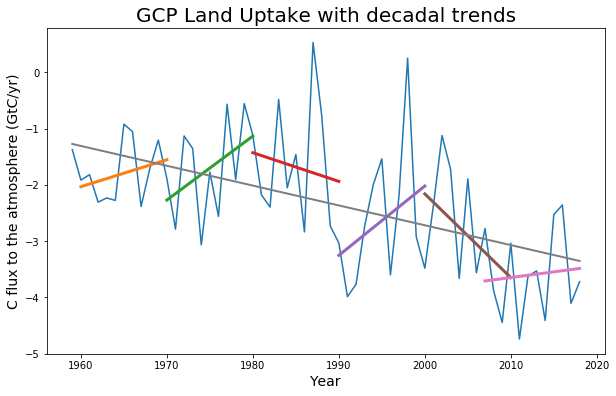

In [14]:
plt.figure(figsize=(10,6))
plt.plot(land)
land_decade = lin_reg(time_dict, land, linewidth=3)
land_whole = lin_reg({'1959-2018':x7}, land, linewidth=2)
plt.title('GCP Land Uptake with decadal trends', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('C flux to the atmosphere (GtC/yr)', fontsize=14)

In [15]:
land_decade, land_whole

({'1960-1970': (0.04793707230000001, 0.304694090749687),
  '1970-1980': (0.11368084784181817, 0.4431819311074735),
  '1980-1990': (-0.05096099036727273, -0.15003491132528893),
  '1990-2000': (0.12322133248727274, 0.3321608184653281),
  '2000-2010': (-0.14878442776545459, -0.47995952248268875),
  '2007-2018': (0.020171318948601392, 0.09316067110697014)},
 {'1959-2018': (-0.03522883036621005, -0.5253427205950755)})

In [16]:
# pickle.dump(land_decade, open('./../Output/output_linreg/GCP/regression_land.pik', 'wb'))

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

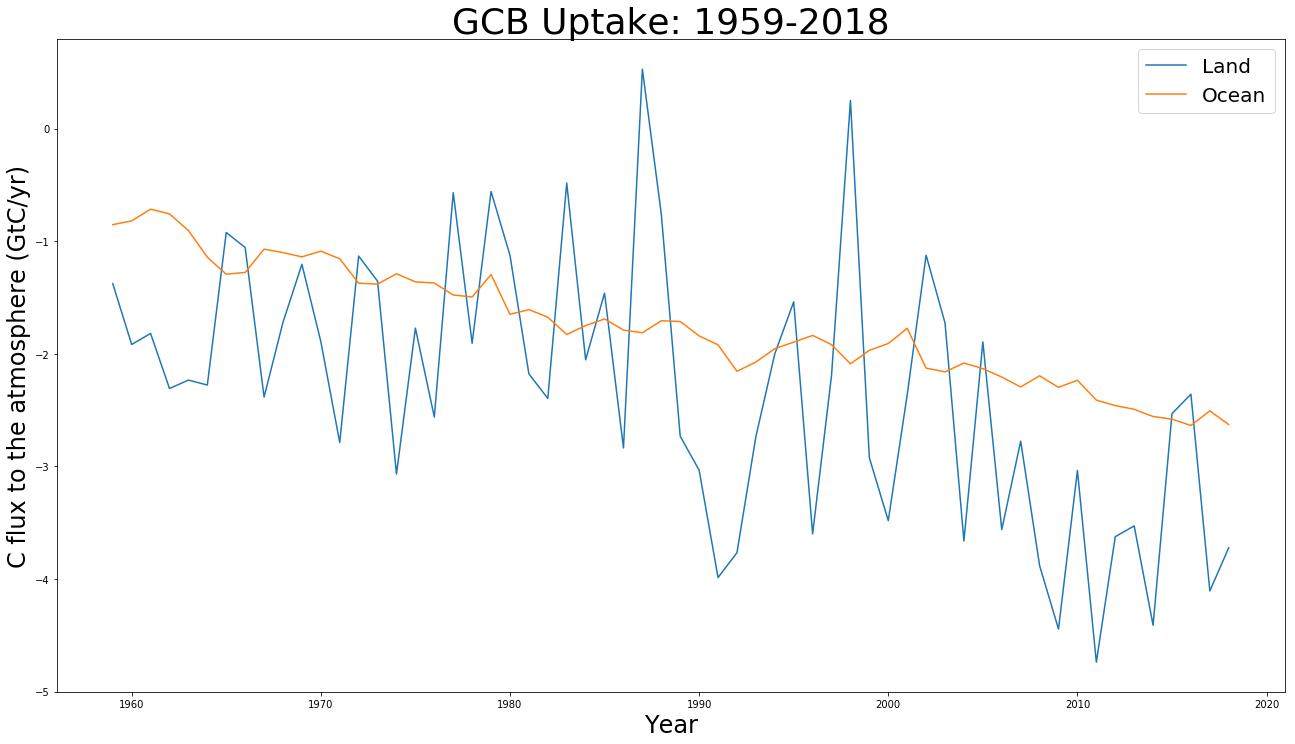

In [17]:
plt.figure(figsize=(22,12))
plt.plot(land.index, land, label="Land")
plt.plot(ocean.index, ocean, label="Ocean")
plt.title('GCB Uptake: 1959-2018', fontsize=36)
plt.legend(fontsize=20)
plt.xlabel('Year', fontsize=24)
plt.ylabel('C flux to the atmosphere (GtC/yr)', fontsize=24)

In [20]:
co2=pd.read_csv('./../co2_temp_data/weighted_co2.csv', usecols=[1,2], index_col='Date')

In [21]:
co2.index[10:-1]

Float64Index([1959.0411,  1959.126, 1959.2027, 1959.2877, 1959.3699, 1959.4548,
               1959.537, 1959.6219, 1959.7068,  1959.789,
              ...
              2017.2027, 2017.2877, 2017.3699, 2017.4548,  2017.537, 2017.6219,
              2017.7068,  2017.789,  2017.874, 2017.9562],
             dtype='float64', name='Date', length=708)

In [22]:
co2_annual = co2.iloc[10:-1]
co2_annual.index=np.floor(co2_annual.index)
co2_annual = co2_annual.groupby('Date').mean()

In [23]:
temp=pd.read_csv('./../co2_temp_data/temp_annual.csv', index_col='Year')
temp.head()

,Temp
Year,
1959,14.03
1960,13.98
1961,14.06
1962,14.04
1963,14.05


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

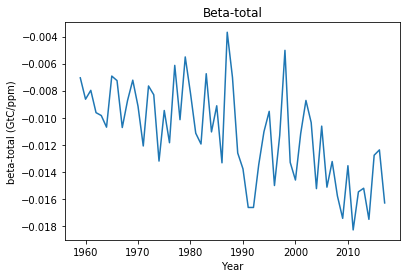

In [24]:
x=ocean.index
y=(land+ocean)/co2_annual.CO2

reg = stats.linregress(x,y)
slope=reg[0]
intercept=reg[1]

line = slope*x+intercept

plt.plot(ocean.index, (land+ocean)/co2_annual.CO2)
plt.plot(x, line)
plt.title('Beta-total')
plt.xlabel('Year')
plt.ylabel('beta-total (GtC/ppm)')
reg

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

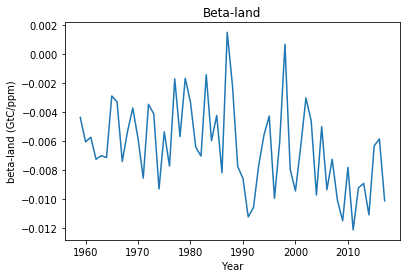

In [25]:
x=land.index
y=land/co2_annual.CO2

reg = stats.linregress(x,y)
slope=reg[0]
intercept=reg[1]

line = slope*x+intercept

plt.plot(land.index, land/co2_annual.CO2)
plt.plot(x, line)
plt.title('Beta-land')
plt.xlabel('Year')
plt.ylabel('beta-land (GtC/ppm)')
reg

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

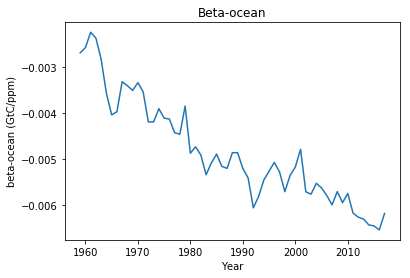

In [26]:
x=ocean.index
y=ocean/co2_annual.CO2

reg = stats.linregress(x,y)
slope=reg[0]
intercept=reg[1]

line = slope*x+intercept

plt.plot(ocean.index, ocean/co2_annual.CO2)
plt.plot(x, line)
plt.title('Beta-ocean')
plt.xlabel('Year')
plt.ylabel('beta-ocean (GtC/ppm)')
reg

Text(0, 0.5, 'Gamma-total (GtC/K)')

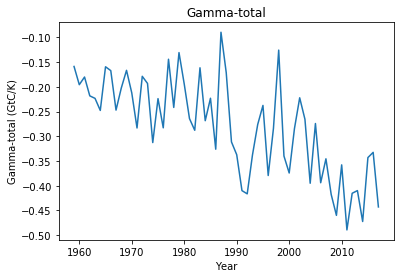

In [27]:
plt.plot(land.index, (land+ocean)/temp.Temp)
plt.title('Gamma-total')
plt.xlabel('Year')
plt.ylabel('Gamma-total (GtC/K)')

Text(0, 0.5, 'Gamma-land (GtC/K)')

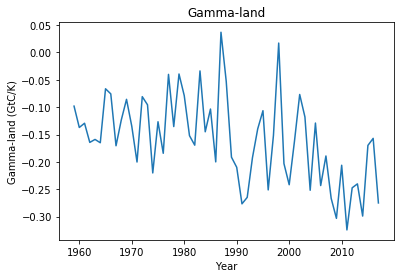

In [28]:
plt.plot(land.index, land/temp.Temp)
plt.title('Gamma-land')
plt.xlabel('Year')
plt.ylabel('Gamma-land (GtC/K)')

Text(0, 0.5, 'Gamma-ocean (GtC/K)')

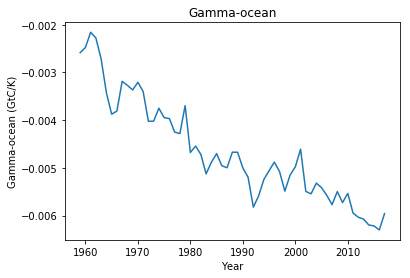

In [29]:
plt.plot(ocean.index, ocean/(co2_annual.CO2+temp.Temp))
plt.title('Gamma-ocean')
plt.xlabel('Year')
plt.ylabel('Gamma-ocean (GtC/K)')

# rolling gradient analysis

In [34]:
test_land = land.iloc[0:11]
stats.linregress(test_land.index, test_land)[0]

0.034259466551818184

In [30]:
def rolling_trend(data, window=10, r_plot=False):
    
    roll_values = []
    r_values = []
    
    for i in range(0,60-window):
        df = data.iloc[i:i+window+1]
        roll_values.append(stats.linregress(df.index, df)[0])
        r_values.append(stats.linregress(df.index, df)[2])
        
    data.plot()
    plt.ylabel('C flux to the atmosphere (GtC/yr)')
    
    roll_df = pd.DataFrame({f'{window}-year trend slope': roll_values}, index=data.index[:-window])
    roll_df.plot(color='g')
    plt.ylabel('Slope of C flux trend (GtC/yr/yr)')
    
    if r_plot:
        r_df = pd.DataFrame({'r-values of trends': r_values}, index=data.index[:-window])
        r_df.plot(color='k')
        plt.ylabel('r-value of slope')
        return roll_df, r_df
    
    return roll_df

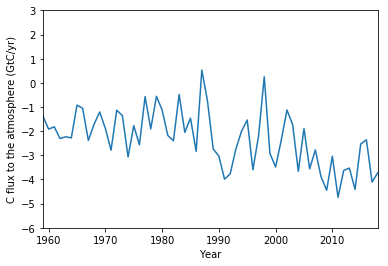

In [31]:
land.plot()
plt.ylabel('C flux to the atmosphere (GtC/yr)')
plt.ylim([-6,3])
# plt.savefig("./GCB_land.png")

In [32]:
land_roll.plot(color='g')
plt.ylabel('Slope of C flux trend (GtC/yr/yr)')
# plt.savefig("./roll_plot_land.png")

NameError: name 'land_roll' is not defined

In [33]:
# land_roll.to_csv("./land_rolling_trend.csv")

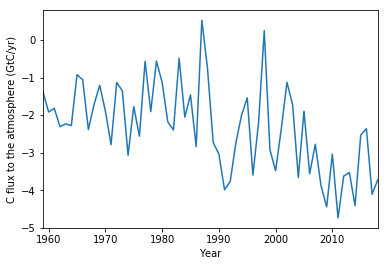

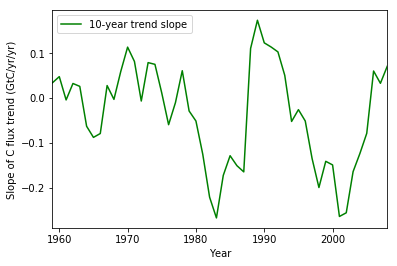

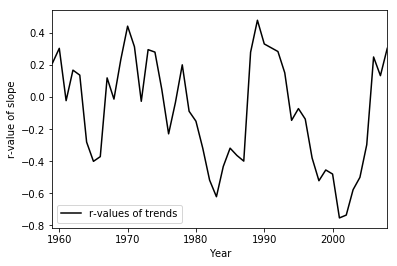

In [34]:
land_roll, land_r = rolling_trend(land, window=10, r_plot=True)

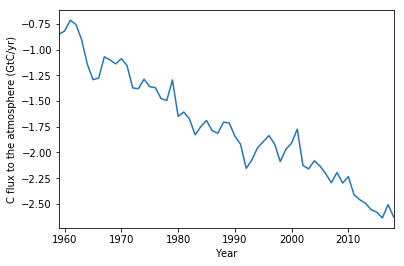

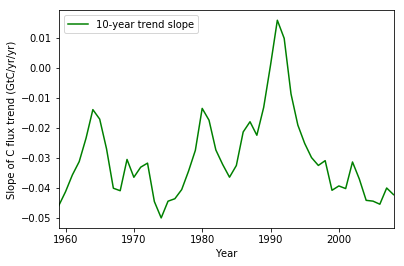

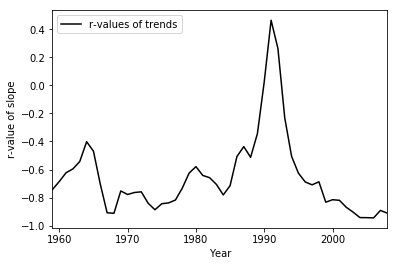

In [35]:
ocean_roll, ocean_r = rolling_trend(ocean, window=10, r_plot=True)

In [36]:
# land_roll.to_csv('./../Output/output_linreg/GCP/land_rolling_trend.csv')
# ocean_roll.to_csv('./../Output/output_linreg/GCP/ocean_rolling_trend.csv')

In [37]:
stats.linregress(ocean_roll.index, ocean_roll.values.squeeze())

LinregressResult(slope=3.5025764754949374e-05, intercept=-0.09931021420740571, rvalue=0.03601818191589617, pvalue=0.8038823594419209, stderr=0.0001402695263533585)

In [38]:
stats.linregress(land_roll.index, land_roll.values.squeeze())

LinregressResult(slope=-0.002256989590367216, intercept=4.441467409544118, rvalue=-0.29226768149372473, pvalue=0.03943850525384229, stderr=0.0010659550674888196)

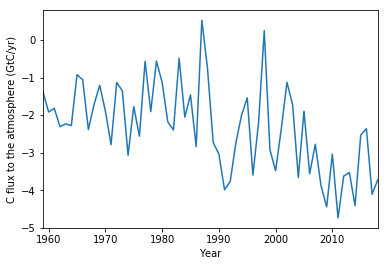

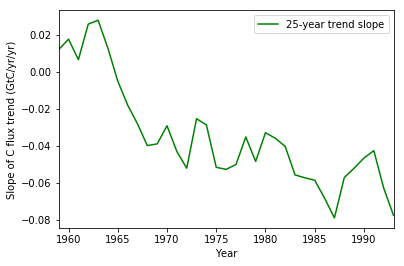

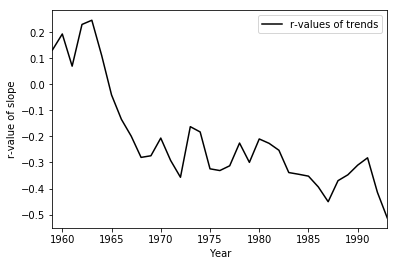

In [39]:
land_roll_25, land_r_25 = rolling_trend(land, window=25, r_plot=True)

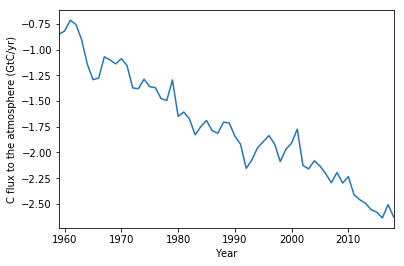

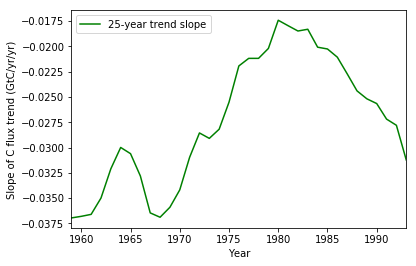

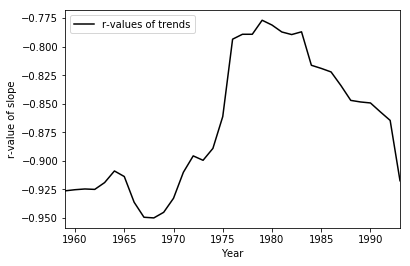

In [40]:
ocean_roll_25, ocean_r_25 = rolling_trend(ocean, window=25, r_plot=True)

In [41]:
stats.linregress(ocean_roll_25.index, ocean_roll_25.values.squeeze())

LinregressResult(slope=0.0004275598275183895, intercept=-0.8722592105212609, rvalue=0.680531097581246, pvalue=6.856135010103097e-06, stderr=8.013634292476068e-05)

In [42]:
stats.linregress(land_roll_25.index, land_roll_25.values.squeeze())

LinregressResult(slope=-0.0023311271965799907, intercept=4.571864377943283, rvalue=-0.8391711482547861, pvalue=3.032081010577586e-10, stderr=0.00026299743370022493)

# Uptake reg vs. temp ave

In [43]:
temp = pd.read_csv('./../co2_temp_data/temp_annual.csv', index_col='Year')
temp.head()

,Temp
Year,
1959,14.03
1960,13.98
1961,14.06
1962,14.04
1963,14.05


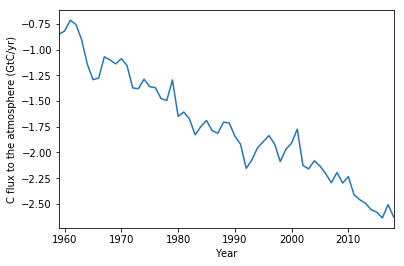

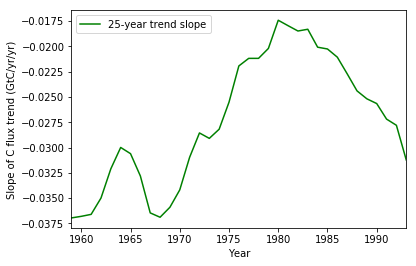

In [44]:
rolling_trend(ocean, window=25);

ValueError: Shape of passed values is (35, 1), indices imply (34, 1)

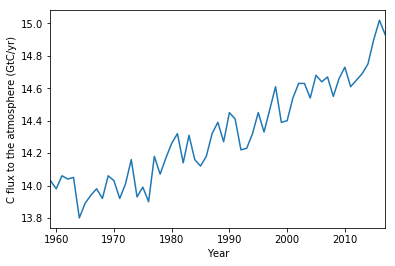

In [45]:
rolling_trend(temp.Temp, window=25);

In [50]:
fGCB = './../../Prelim_Data_Analysis/gcb_data/budget.csv'
emissions = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,1,3])
emissions.head()

,fossil fuel and industry,atmospheric growth
Year,,
1959,2.453378,2.0352
1960,2.568376,1.5052
1961,2.579724,1.6536
1962,2.685099,1.1872
1963,2.832715,1.2084


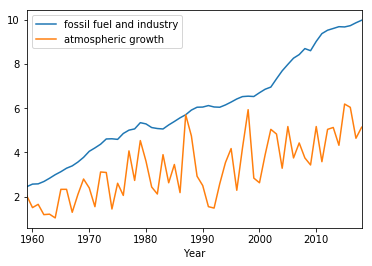

In [51]:
emissions.plot()

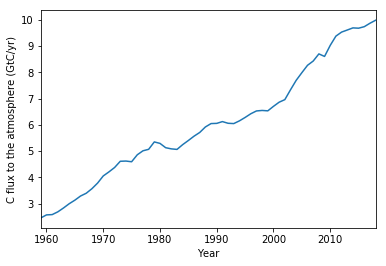

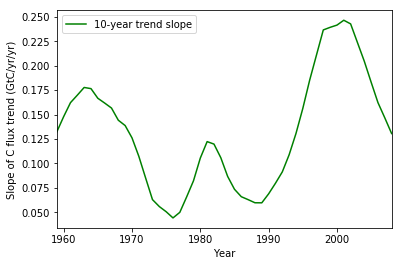

In [60]:
rolling_trend(emissions["fossil fuel and industry"], window=10);

In [53]:
# def rolling_trend(data, window=10, r_plot=False):
    
#     roll_values = []
#     r_values = []
    
#     for i in range(0,60-window):
#         df = data.iloc[i:i+window+1]
#         roll_values.append(stats.linregress(df.index, df)[0])
#         r_values.append(stats.linregress(df.index, df)[2])
        
#     data.plot()
#     plt.ylabel('C flux to the atmosphere (GtC/yr)')
    
#     roll_df = pd.DataFrame({f'{window}-year trend slope': roll_values}, index=data.index[:-window])
#     roll_df.plot(color='g')
#     plt.ylabel('Slope of C flux trend (GtC/yr/yr)')
    
#     if r_plot:
#         r_df = pd.DataFrame({'r-values of trends': r_values}, index=data.index[:-window])
#         r_df.plot(color='k')
#         plt.ylabel('r-value of slope')
#         return roll_df, r_df
    
#     return roll_df